In [1]:
!wget https://github.com/gbiamgaurav/github_datasets/raw/main/income_inequality.zip

--2023-09-13 16:52:19--  https://github.com/gbiamgaurav/github_datasets/raw/main/income_inequality.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/gbiamgaurav/github_datasets/main/income_inequality.zip [following]
--2023-09-13 16:52:19--  https://media.githubusercontent.com/media/gbiamgaurav/github_datasets/main/income_inequality.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5557605 (5.3M) [application/zip]
Saving to: ‘income_inequality.zip.2’

income_inequality.z 100%[===================>]   5.30M  --.-KB/s    in 0.03s   

2023-09-13 16:52:19 (200 MB/s) - ‘income_inequ

In [2]:
!unzip /content/income_inequality.zip

Archive:  /content/income_inequality.zip
replace income_inequality_prediction.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: income_inequality_prediction.csv  


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score,
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from mlxtend.evaluate import mcnemar_table, mcnemar_tables
from mlxtend.plotting import checkerboard_plot, plot_decision_regions
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.evaluate import bias_variance_decomp
from sklearn.decomposition import PCA

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

%matplotlib inline

sns.set_style('darkgrid')
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/income_inequality_prediction.csv")

df.shape

(209499, 43)

## Exploratory Data Analysis

In [5]:
df.head()

ID  age   gender               education                class  \
0  ID_TZ0000   79   Female    High school graduate                  NaN   
1  ID_TZ0001   65   Female    High school graduate                  NaN   
2  ID_TZ0002   21     Male   12th grade no diploma   Federal government   
3  ID_TZ0003    2   Female                Children                  NaN   
4  ID_TZ0004   70     Male    High school graduate                  NaN   

  education_institute                    marital_status  \
0                 NaN                           Widowed   
1                 NaN                           Widowed   
2                 NaN                     Never married   
3                 NaN                     Never married   
4                 NaN   Married-civilian spouse present   

                         race is_hispanic      employment_commitment  \
0                       White   All other         Not in labor force   
1                       White   All other   Children or Armed Forces   
2                       Black   All other   Children or Armed Forces   
3   Asian or Pacific Islander   All other   Children or Armed Forces   
4                       White   All other         Not in labor force   

  unemployment_reason  employment_stat  wage_per_hour is_labor_union  \
0                 NaN                0              0            NaN   
1                 NaN                0              0            NaN   
2                 NaN                0            500             No   
3                 NaN                0              0            NaN   
4                 NaN                0              0            NaN   

   working_week_per_year  industry_code            industry_code_main  \
0                     52              0   Not in universe or children   
1                      0              0   Not in universe or children   
2                     15             41             Hospital services   
3                      0              0   Not in universe or children   
4                      0              0   Not in universe or children   

   occupation_code             occupation_code_main  total_employed  \
0                0                              NaN               2   
1                0                              NaN               0   
2               26   Adm support including clerical               4   
3                0                              NaN               0   
4                0                              NaN               0   

                             household_stat              household_summary  \
0                               Householder                    Householder   
1                     Nonfamily householder                    Householder   
2   Child 18+ never marr Not in a subfamily              Child 18 or older   
3     Child <18 never marr not in subfamily   Child under 18 never married   
4                     Spouse of householder          Spouse of householder   

         under_18_family veterans_admin_questionnaire  vet_benefit  \
0                    NaN                          NaN            2   
1                    NaN                          NaN            2   
2                    NaN                          NaN            2   
3   Both parents present                          NaN            0   
4                    NaN                          NaN            2   

           tax_status  gains  losses  stocks_status citizenship  mig_year  \
0   Head of household      0       0            292      Native        95   
1              Single      0       0              0      Native        94   
2              Single      0       0              0      Native        94   
3            Nonfiler      0       0              0      Native        94   
4      Joint both 65+      0       0              0      Native        95   

  country_of_birth_own country_of_birth_father country_of_birth_mother  \
0                   US                      U

In [6]:
## Dropping the ID column

df.drop(columns=["ID"], axis=1, inplace=True)

df.shape

(209499, 42)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             209499 non-null  int64  
 1   gender                          209499 non-null  object 
 2   education                       209499 non-null  object 
 3   class                           104254 non-null  object 
 4   education_institute             13302 non-null   object 
 5   marital_status                  209499 non-null  object 
 6   race                            209499 non-null  object 
 7   is_hispanic                     209499 non-null  object 
 8   employment_commitment           209499 non-null  object 
 9   unemployment_reason             6520 non-null    object 
 10  employment_stat                 209499 non-null  int64  
 11  wage_per_hour                   209499 non-null  int64  
 12  is_labor_union  

In [8]:
df.describe()

age  employment_stat  wage_per_hour  working_week_per_year  \
count  209499.000000    209499.000000  209499.000000          209499.000000   
mean       34.518728         0.176760      55.433487              23.158850   
std        22.306738         0.555562     276.757327              24.397963   
min         0.000000         0.000000       0.000000               0.000000   
25%        15.000000         0.000000       0.000000               0.000000   
50%        33.000000         0.000000       0.000000               8.000000   
75%        50.000000         0.000000       0.000000              52.000000   
max        90.000000         2.000000    9999.000000              52.000000   

       industry_code  occupation_code  total_employed    vet_benefit  \
count  209499.000000    209499.000000   209499.000000  209499.000000   
mean       15.332398        11.321734        1.956067       1.515854   
std        18.049655        14.460839        2.365154       0.850853   
min         0.000000         0.000000        0.000000       0.000000   
25%         0.000000         0.000000        0.000000       2.000000   
50%         0.000000         0.000000        1.000000       2.000000   
75%        33.000000        26.000000        4.000000       2.000000   
max        51.000000        46.000000        6.000000       2.000000   

               gains         losses  stocks_status       mig_year  \
count  209499.000000  209499.000000  209499.000000  209499.000000   
mean      435.926887      36.881737     194.533420      94.499745   
std      4696.359500     270.383302    1956.375501       0.500001   
min         0.000000       0.000000       0.000000      94.000000   
25%         0.000000       0.000000       0.000000      94.000000   
50%         0.000000       0.000000       0.000000      94.000000   
75%         0.000000       0.000000       0.000000      95.000000   
max     99999.000000    4608.000000   99999.000000      95.000000   

       importance_of_record  
count         209499.000000  
mean            1740.888324  
std              995.559557  
min               37.870000  
25%             1061.290000  
50%             1617.040000  
75%             2185.480000  
max            18656.300000

In [9]:
## Checking the categorical columns

df.describe(include=['O']).T

count unique  \
gender                          209499      2   
education                       209499     17   
class                           104254      8   
education_institute              13302      2   
marital_status                  209499      7   
race                            209499      5   
is_hispanic                     209499     10   
employment_commitment           209499      8   
unemployment_reason               6520      5   
is_labor_union                   20079      2   
industry_code_main              209499     24   
occupation_code_main            103805     14   
household_stat                  209499     38   
household_summary               209499      8   
under_18_family                  57845      4   
veterans_admin_questionnaire      2084      2   
tax_status                      209499      6   
citizenship                     209499      5   
country_of_birth_own            209499     43   
country_of_birth_father         209499     43   
country_of_birth_mother         209499     43   
migration_code_change_in_msa    207911      9   
migration_prev_sunbelt          121047      3   
migration_code_move_within_reg  207911      9   
migration_code_change_in_reg    207911      8   
residence_1_year_ago            103215      2   
old_residence_reg                16351      5   
old_residence_state              16351     50   
income_above_limit              209499      2   

                                                            top    freq  
gender                                                   Female  108784  
education                                  High school graduate   50627  
class                                                   Private   75617  
education_institute                                 High school    7247  
marital_status                                    Never married   90723  
race                                                      White  175709  
is_hispanic                                           All other  180404  
employment_commitment                  Children or Armed Forces  129789  
unemployment_reason                             Other job loser    2242  
is_labor_union                                               No   16968  
industry_code_main                  Not in universe or children  105694  
occupation_code_main             Adm support including clerical   15351  
household_stat                                      Householder   56195  
household_summary                                   Householder   79470  
under_18_family                            Both parents present   40875  
veterans_admin_questionnaire                                 No    1684  
tax_status                                             Nonfiler   78671  
citizenship                                              Native  185669  
country_of_birth_own                                         US  185666  
country_of_birth_father                                      US  166968  
country_of_birth_mother                                      US  168233  
migration_code_change_in_msa                                  ?  104696  
migration_prev_sunbelt                                        ?  104696  
migration_code_move_within_reg                                ?  104696  
migration_code_change_in_reg                                  ?  104696  
residence_1_year_ago                                       Same   86864  
old_residence_reg                                         South    5056  
old_residence_state                                  California    1849  
income_above_limit                                  Below limit  196501

In [10]:
## Check for missing values

df.isna().sum()

age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit                            0
tax_status      

In [11]:
# Check unique values of target varaible
df['income_above_limit'].value_counts()

Below limit    196501
Above limit     12998
Name: income_above_limit, dtype: int64

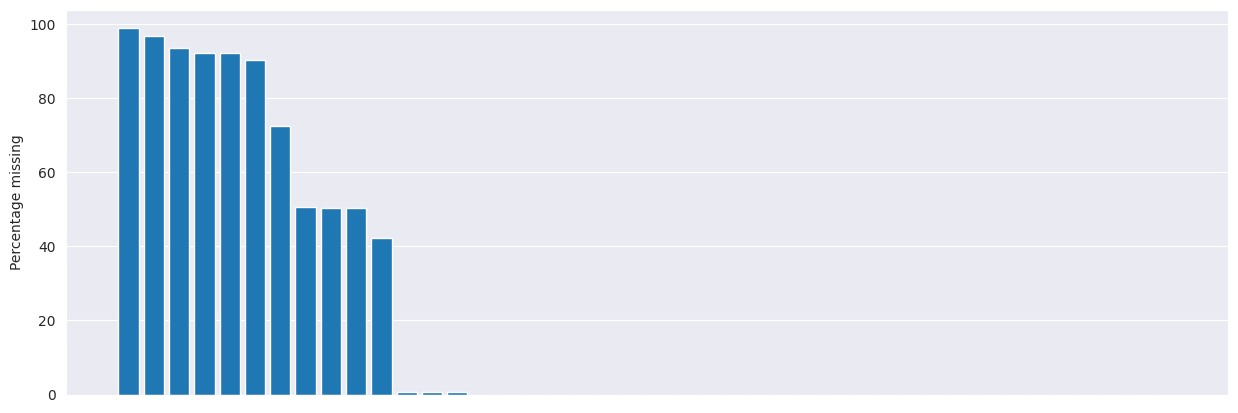

In [12]:
# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [13]:
## Dropping columns which has more than 70% of missing values

dropcols = missing[missing[0]>70]
dropcols

0
veterans_admin_questionnaire  99.005246
unemployment_reason           96.887813
education_institute           93.650566
old_residence_reg             92.195189
old_residence_state           92.195189
is_labor_union                90.415706
under_18_family               72.388890

In [14]:
dropcols.shape

(7, 1)

In [15]:
df.drop(list(dropcols.index), axis=1, inplace=True)

In [16]:
# Check shape of the dataset after dropping columns
df.shape

(209499, 35)

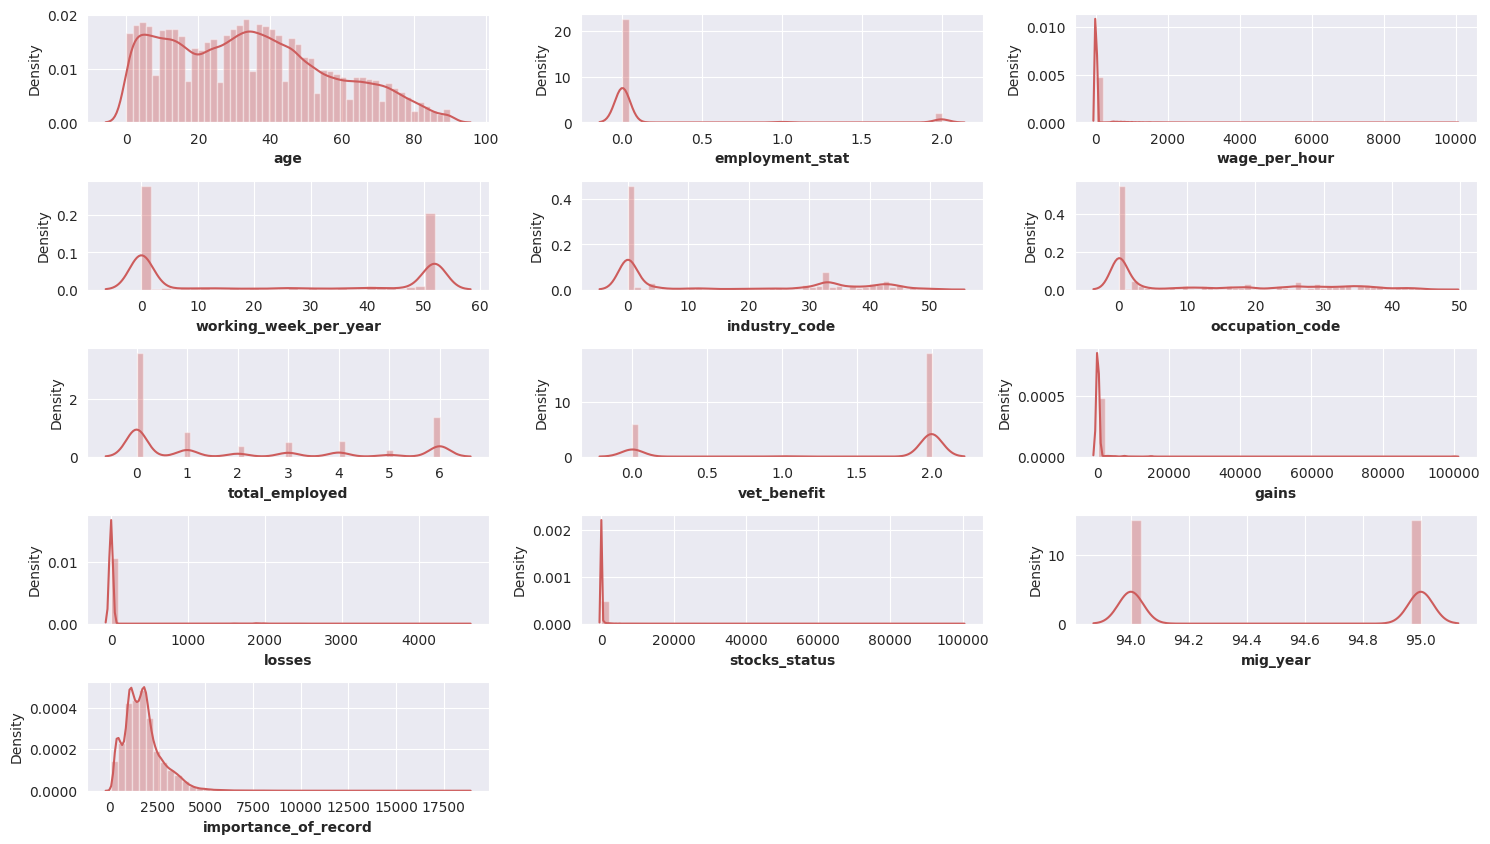

In [17]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

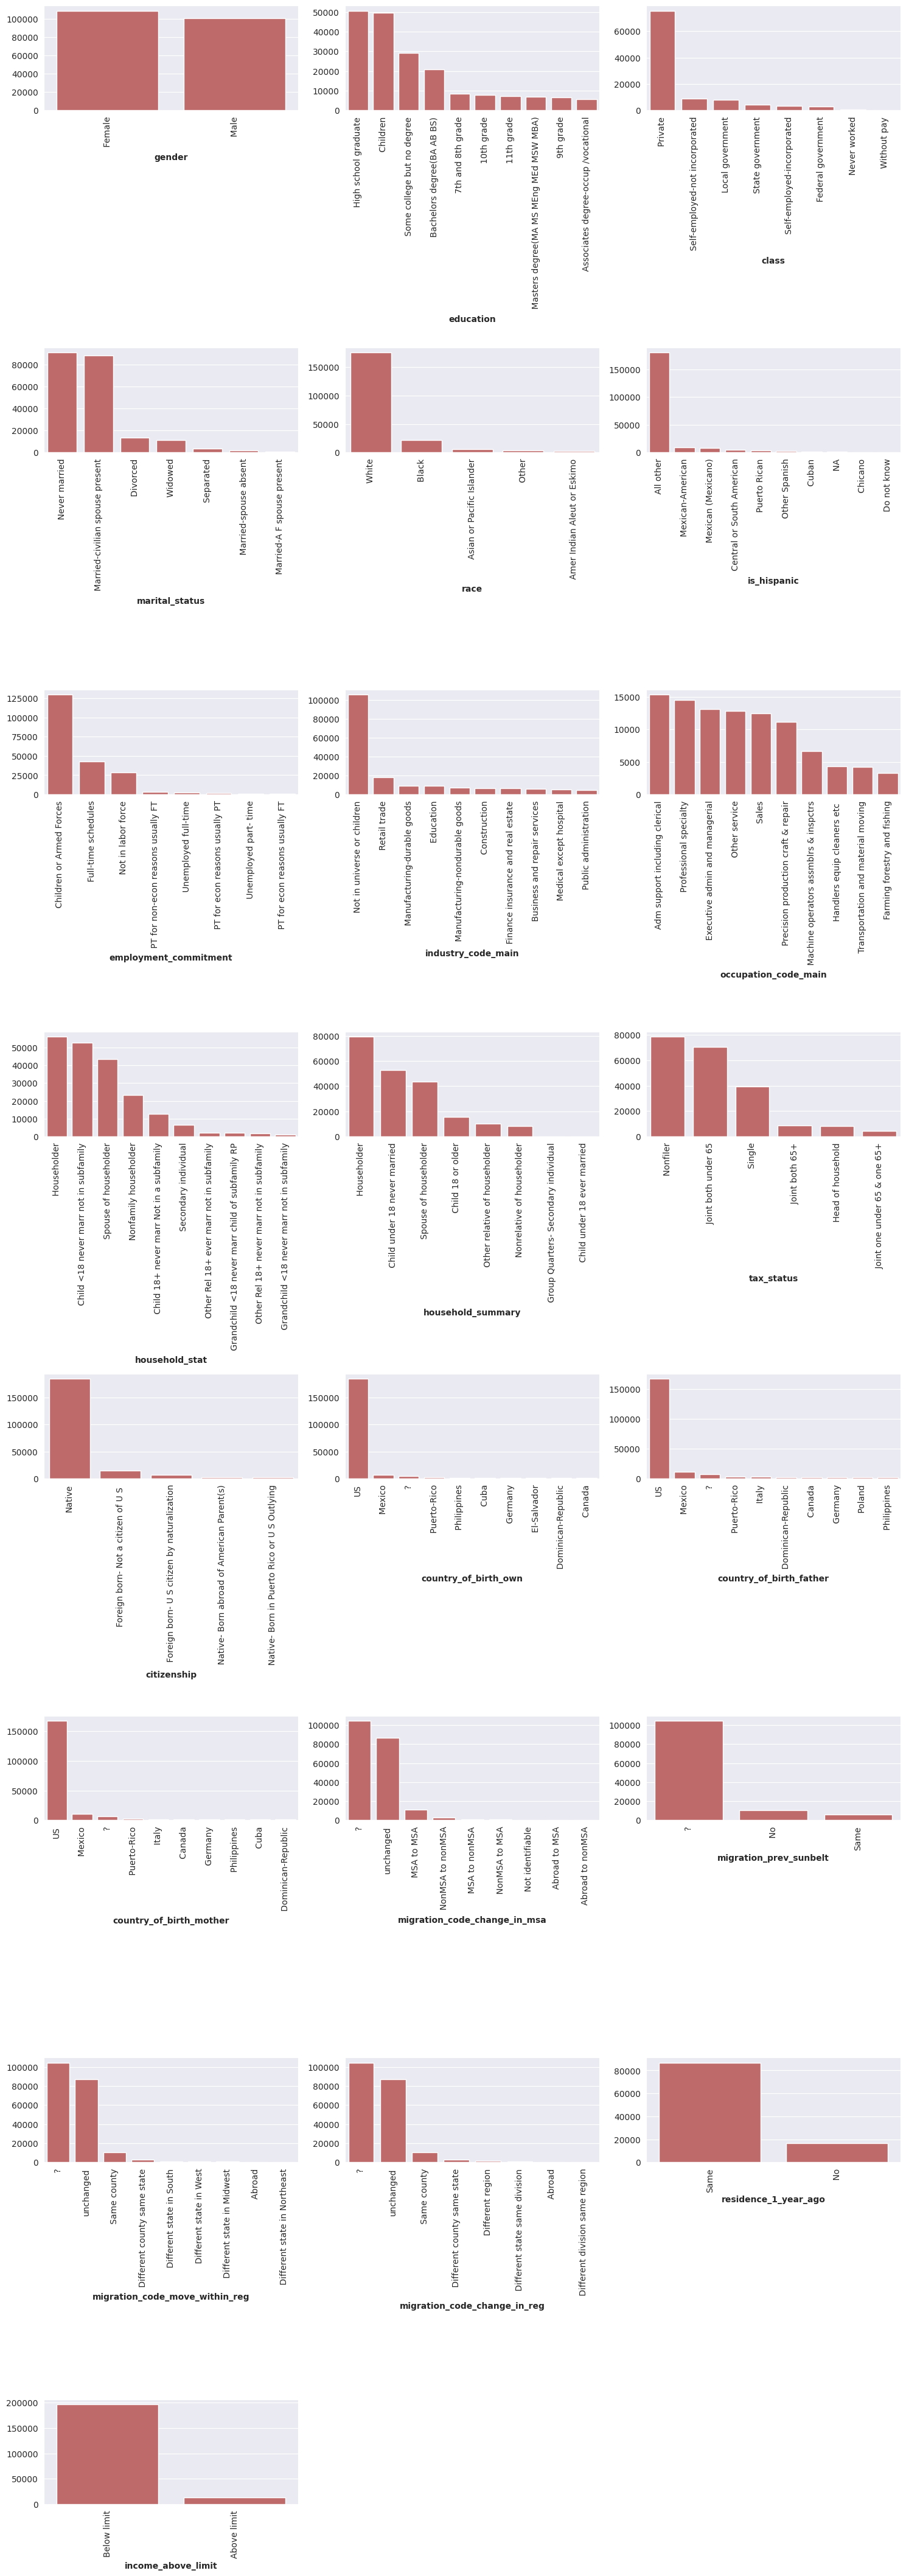

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the number of top categories to display
top_n_categories = 10

# Find categorical columns with too many unique values
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

plt.figure(figsize=(15, 120))
for i, col in enumerate(cat_features):
    plt.subplot(len(cat_features), 3, i+1)
    # Get the top N most frequent categories
    top_categories = df[col].value_counts().head(top_n_categories)
    sns.barplot(x=top_categories.index, y=top_categories.values, color='indianred')
    plt.xlabel(col, weight='bold')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.tight_layout()

In [19]:
df.isna().sum() # add .sum() to get total count of missing values in column

age                                    0
gender                                 0
education                              0
class                             105245
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
employment_stat                        0
wage_per_hour                          0
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
vet_benefit                            0
tax_status                             0
gains                                  0
losses                                 0
stocks_status                          0
citizenship                            0
mig_year        

In [20]:
print("Number of duplicates: ", df.duplicated().sum())

Number of duplicates:  4544


In [21]:
# Remove duplicate rows
df = df.drop_duplicates()

In [22]:
df.shape

(204955, 35)

In [23]:
print("Unique values per column:")
df.nunique()

Unique values per column:


age                                   91
gender                                 2
education                             17
class                                  8
marital_status                         7
race                                   5
is_hispanic                           10
employment_commitment                  8
employment_stat                        3
wage_per_hour                       1232
working_week_per_year                 53
industry_code                         52
industry_code_main                    24
occupation_code                       47
occupation_code_main                  14
total_employed                         7
household_stat                        38
household_summary                      8
vet_benefit                            3
tax_status                             6
gains                                132
losses                               114
stocks_status                       1499
citizenship                            5
mig_year        

In [24]:
for i in df.columns:
    print(f"Unique value in {i}:")
    print(df[i].unique(),'\n')

Unique value in age:
[79 65 21  2 70 45 53 22 73 30  4 16 43 36  5 88 40 47 59 69 50 27 39 85
 29 41 14 33 67 52 11  9 13 19 26 23 37 58 63 46 62 28 31  3 18 78 15 38
  7 35  1 20  0 48 24 56 25  8 66 71 32 75 51 10 44 42 55 74 77 34 80 17
 83 86 12 68 60 57 64 72 90 61 82  6 84 49 76 54 89 81 87] 

Unique value in gender:
[' Female' ' Male'] 

Unique value in education:
[' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)'] 

Unique value in class:
[nan ' Federal government' ' Private' ' Local government'
 ' Self-employed-incorporated' ' Self-employed-not incorporated'
 ' State government' ' Wi

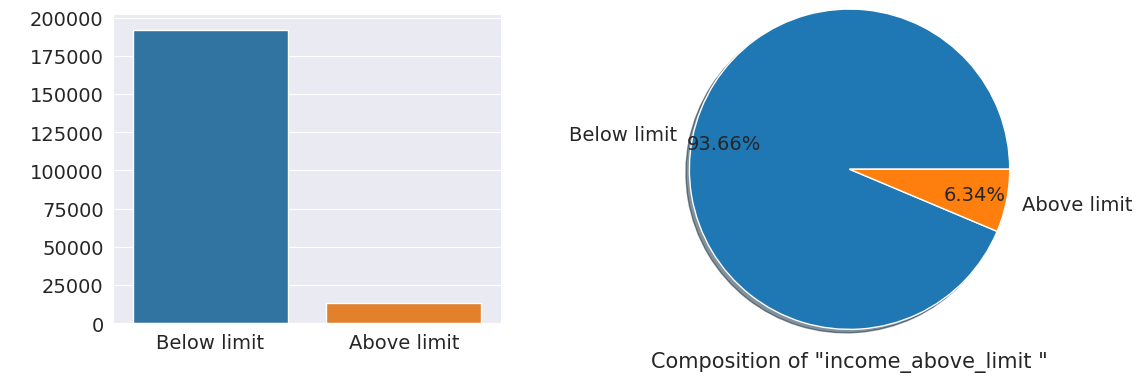

In [25]:
# checking the target
plt.figure(figsize=(12,4))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["income_above_limit"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(df["income_above_limit"].value_counts(),
        labels=list(df["income_above_limit"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "income_above_limit "', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

## Data Preprocessing

In [26]:
df.isnull().sum()

age                                    0
gender                                 0
education                              0
class                             100721
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
employment_stat                        0
wage_per_hour                          0
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              101169
total_employed                         0
household_stat                         0
household_summary                      0
vet_benefit                            0
tax_status                             0
gains                                  0
losses                                 0
stocks_status                          0
citizenship                            0
mig_year        

In [27]:
df.columns

Index(['age', 'gender', 'education', 'class', 'marital_status', 'race',
       'is_hispanic', 'employment_commitment', 'employment_stat',
       'wage_per_hour', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'importance_of_record', 'income_above_limit'],
      dtype='object')

In [28]:
## Dropping columns that can cause imbalance while imputation

df.drop(columns=["is_hispanic", "country_of_birth_mother", "country_of_birth_own"], axis=1, inplace=True)

In [29]:
df.shape

(204955, 32)

In [30]:
## Impute the categorical columns

impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = df[feat].mode()[0]
    df[feat].fillna(mode, inplace=True)

In [31]:
df.isnull().sum()

age                               0
gender                            0
education                         0
class                             0
marital_status                    0
race                              0
employment_commitment             0
employment_stat                   0
wage_per_hour                     0
working_week_per_year             0
industry_code                     0
industry_code_main                0
occupation_code                   0
occupation_code_main              0
total_employed                    0
household_stat                    0
household_summary                 0
vet_benefit                       0
tax_status                        0
gains                             0
losses                            0
stocks_status                     0
citizenship                       0
mig_year                          0
country_of_birth_father           0
migration_code_change_in_msa      0
migration_prev_sunbelt            0
migration_code_move_within_r

In [32]:
df.head(2)

age   gender              education     class marital_status    race  \
0   79   Female   High school graduate   Private        Widowed   White   
1   65   Female   High school graduate   Private        Widowed   White   

       employment_commitment  employment_stat  wage_per_hour  \
0         Not in labor force                0              0   
1   Children or Armed Forces                0              0   

   working_week_per_year  industry_code            industry_code_main  \
0                     52              0   Not in universe or children   
1                      0              0   Not in universe or children   

   occupation_code             occupation_code_main  total_employed  \
0                0   Adm support including clerical               2   
1                0   Adm support including clerical               0   

           household_stat household_summary  vet_benefit          tax_status  \
0             Householder       Householder            2   Head of household   
1   Nonfamily householder       Householder            2              Single   

   gains  losses  stocks_status citizenship  mig_year country_of_birth_father  \
0      0       0            292      Native        95                      US   
1      0       0              0      Native        94                      US   

  migration_code_change_in_msa migration_prev_sunbelt  \
0                            ?                      ?   
1                    unchanged                      ?   

  migration_code_move_within_reg migration_code_change_in_reg  \
0                              ?                            ?   
1                      unchanged                    unchanged   

  residence_1_year_ago  importance_of_record income_above_limit  
0                 Same               1779.74        Below limit  
1                 Same               2366.75        Below limit

In [33]:
numerical_features = df.select_dtypes(exclude="object").columns

numerical_features

Index(['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year',
       'industry_code', 'occupation_code', 'total_employed', 'vet_benefit',
       'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record'],
      dtype='object')

In [34]:
categorical_features = df.select_dtypes(include="object").columns

categorical_features

Index(['gender', 'education', 'class', 'marital_status', 'race',
       'employment_commitment', 'industry_code_main', 'occupation_code_main',
       'household_stat', 'household_summary', 'tax_status', 'citizenship',
       'country_of_birth_father', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'income_above_limit'],
      dtype='object')

## Encoding

In [35]:
## Define the pipeline

num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", RobustScaler())
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder", OrdinalEncoder()),
    ]
)

In [36]:
X = df.drop(columns=['income_above_limit'], axis=1)

y = df["income_above_limit"]

In [37]:
## Mannually encoding the target variable

y = y.replace({'Below limit': 0,
               'Above limit': 1})

In [38]:
## Define numerical and categorical features

## numerical features

numeric_features = X.select_dtypes(exclude="object").columns
numeric_features

Index(['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year',
       'industry_code', 'occupation_code', 'total_employed', 'vet_benefit',
       'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record'],
      dtype='object')

In [39]:
## Categorical features

categorical_features = X.select_dtypes(include="object").columns
categorical_features

Index(['gender', 'education', 'class', 'marital_status', 'race',
       'employment_commitment', 'industry_code_main', 'occupation_code_main',
       'household_stat', 'household_summary', 'tax_status', 'citizenship',
       'country_of_birth_father', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago'],
      dtype='object')

In [51]:
## Scale the features

from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ("OrdinalEncoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features),
    ("RobustScaler", RobustScaler(), numeric_features)
], remainder="passthrough")

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
X_train = transformer.fit_transform(X_train)

In [54]:
X_test = transformer.transform(X_test)

In [55]:
X_train.shape, X_test.shape

((163964, 31), (40991, 31))

In [56]:
# upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= 0, n=153547 (93.65%)
Class= 1, n=10417 (6.35%)
Class= 0, n=153547 (50.00%)
Class= 1, n=153547 (50.00%)
Upsampled data shape:  (307094, 31) (307094,)


## Baseline Modelling

In [57]:
def evaluate_model(true, predicted):
    score_f1 = f1_score(true, predicted, average="weighted")
    accuracy = accuracy_score(true, predicted)

    return score_f1, accuracy

In [58]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

def fit_classification_models(X, y, test_size=0.2, random_state=42):
    """
    Fit classification models using XGBoost, RandomForest, and ExtraTrees classifiers.

    Parameters:
    -----------
    X : array-like of shape (n_samples, n_features)
        The input data.

    y : array-like of shape (n_samples,)
        The target variable.

    test_size : float, default=0.2
        The proportion of the dataset to include in the test split.

    random_state : int, default=42
        Controls the randomness of the dataset splitting.

    Returns:
    --------
    results : dict
        A dictionary containing the performance metrics for XGBoost, RandomForest, and ExtraTrees classifiers.
    """
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create pipelines for XGBoost, RandomForest, and ExtraTrees classifiers
    pipelines = {
        'XGBoost': Pipeline([('scaler', RobustScaler()), ('classifier', XGBClassifier())]),
        'Random Forest': Pipeline([('scaler', RobustScaler()), ('classifier', RandomForestClassifier())]),
        'ExtraTreesClassifier': Pipeline([('scaler', RobustScaler()), ('classifier', ExtraTreesClassifier())]),
    }

    # Fit and evaluate XGBoost, RandomForest, and ExtraTrees classifiers
    results = {}

    for classifier_name, pipeline in pipelines.items():
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="weighted")
        results[classifier_name] = {'accuracy': accuracy, 'f1-score': f1}

    return results

In [59]:
results = fit_classification_models(X_train, y_train)

In [60]:
# Create a DataFrame from the results
df = pd.DataFrame(results).transpose()

# Sort the DataFrame by the F1-score in descending order
df_sorted = df.sort_values(by='f1-score', ascending=False)

# Display the sorted DataFrame
df_sorted

accuracy  f1-score
ExtraTreesClassifier  0.980951  0.980950
Random Forest         0.975806  0.975806
XGBoost               0.974405  0.974403

In [61]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from sklearn.metrics import (accuracy_score,
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

from sklearn.model_selection import GridSearchCV, KFold

In [62]:
def model_performance(model, y_test, y_hat) :
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2,
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values),
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))


    #plots
    model = model

    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False,
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))

    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)

    fig['layout'].update(showlegend = False, title = 'Model performance report'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14

    py.iplot(fig)

In [63]:
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)
y_pred = extratree.predict(X_test)

In [64]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
model_performance(extratree,y_test, y_pred)

In [67]:
top_feat_importances = print(extratree.feature_importances_)

[0.1167578  0.05027764 0.0204133  0.02494073 0.01005896 0.00846524
 0.0261758  0.05649394 0.03288592 0.02361127 0.04217355 0.00888996
 0.00844405 0.00498186 0.00401602 0.00461653 0.00455918 0.00539711
 0.06399407 0.0211987  0.00625871 0.12354006 0.05722035 0.08245767
 0.07960338 0.02665251 0.02197441 0.00784165 0.02722106 0.0051983
 0.02368024]


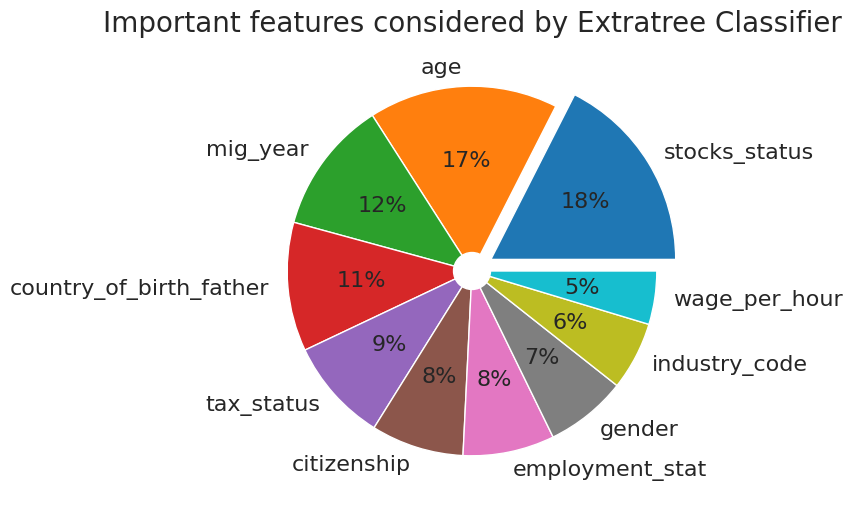

In [76]:
feat_importances = pd.Series(extratree.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
myexplode = [0.12,0,0,0,0,0,0,0,0,0]
plt.pie(feat_importances.nlargest(10),labels=feat_importances.nlargest(10).index, autopct='%.0f%%',explode= myexplode,
        textprops={'fontsize': 16})
centre_circle = plt.Circle((0,0),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Important features considered by Extratree Classifier',fontsize=20)
plt.show()